In [1]:
import pandas as pd
X_train = pd.read_csv("X_train_scal.csv")
X_test = pd.read_csv("X_test_scal.csv")
X_train

,age,sex,bmi,children,smoker,region
0,0.304348,0.0,0.419155,0.2,1.0,1.000000
1,0.239130,0.0,0.434490,0.4,1.0,0.666667
2,0.043478,0.0,0.366963,0.0,1.0,0.000000
3,0.630435,0.0,0.286252,0.4,1.0,1.000000
4,0.630435,1.0,0.544256,0.0,0.0,0.333333
...,...,...,...,...,...,...
1065,0.347826,1.0,0.297014,0.4,1.0,0.000000
1066,0.586957,1.0,0.552058,0.4,0.0,0.666667
1067,0.326087,0.0,0.224644,0.0,1.0,0.333333
1068,0.065217,1.0,0.195050,0.0,1.0,0.333333


In [2]:
X_test

,age,sex,bmi,children,smoker,region
0,0.086957,1.0,0.347592,0.0,1.0,1.000000
1,0.934783,0.0,0.375572,0.6,0.0,0.333333
2,0.782609,0.0,0.449825,0.0,1.0,1.000000
3,0.043478,1.0,0.162497,0.2,1.0,0.000000
4,0.217391,0.0,0.461394,0.0,1.0,0.333333
...,...,...,...,...,...,...
263,0.826087,0.0,0.286252,0.2,1.0,0.666667
264,0.413043,0.0,0.603444,0.0,0.0,0.333333
265,0.760870,0.0,0.594566,0.6,1.0,0.333333
266,0.434783,1.0,0.567393,0.2,1.0,1.000000


In [3]:
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_test

,charges
0,2250.83520
1,30942.19180
2,10923.93320
3,1964.78000
4,3171.61490
...,...
263,12044.34200
264,40419.01910
265,20462.99766
266,6079.67150


In [4]:
y_train

,charges
0,5148.55260
1,4922.91590
2,1875.34400
3,9715.84100
4,41676.08110
...,...
1065,11737.84884
1066,42760.50220
1067,4185.09790
1068,1515.34490


In [6]:
from pickle import dump, load
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

mse_list = []

for p in [1, 0.8, 0.7, 0.6, 0.5]:
    selection_model = SelectKBest(f_regression, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

    

    model = LinearRegression()
    model.fit(train_sel, y_train)
    y_pred = model.predict(train_sel)
    mse = mean_squared_error(y_train, y_pred)
    mse_list.append(mse)


best_mse = mse_list.index(max(mse_list))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [7]:
best_mse

3

In [9]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,age,bmi,children,smoker
0,0.304348,0.419155,0.2,1.0
1,0.239130,0.434490,0.4,1.0
2,0.043478,0.366963,0.0,1.0
3,0.630435,0.286252,0.4,1.0
4,0.630435,0.544256,0.0,0.0
...,...,...,...,...
1065,0.347826,0.297014,0.4,1.0
1066,0.586957,0.552058,0.4,0.0
1067,0.326087,0.224644,0.0,1.0
1068,0.065217,0.195050,0.0,1.0


In [10]:
X_test_sel

,age,bmi,children,smoker
0,0.086957,0.347592,0.0,1.0
1,0.934783,0.375572,0.6,0.0
2,0.782609,0.449825,0.0,1.0
3,0.043478,0.162497,0.2,1.0
4,0.217391,0.461394,0.0,1.0
...,...,...,...,...
263,0.826087,0.286252,0.2,1.0
264,0.413043,0.603444,0.0,0.0
265,0.760870,0.594566,0.6,1.0
266,0.434783,0.567393,0.2,1.0


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [13]:
model.fit(X_train_sel, y_train)

LinearRegression()

In [14]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b2, b3): {model.coef_}")

Intercepto (a): [21311.05282506]
Coeficientes (b1, b2, b2, b3): [[ 12042.45275464  12205.32590059   2491.05748482 -23822.15538366]]


In [15]:
y_pred = model.predict(X_test_sel)
y_pred

array([[ 2778.54264662],
       [38646.73768535],
       [12403.68796713],
       [  494.01825396],
       [ 5738.28117295],
       [ 9731.42228009],
       [26591.85628089],
       [ 1572.85813264],
       [ 7748.30263787],
       [ 5072.90679248],
       [27204.30449592],
       [ 3061.4740498 ],
       [13343.11876138],
       [ 7596.93657353],
       [ 9556.44550667],
       [11906.63542923],
       [31561.61627214],
       [12140.99225991],
       [ 8645.75193508],
       [ 5277.19902226],
       [10069.59811446],
       [ 7376.18974347],
       [33060.1745018 ],
       [15115.1964952 ],
       [10128.74016072],
       [15197.75940737],
       [11728.42628577],
       [17646.14810601],
       [11183.38052088],
       [ 8161.56709704],
       [11267.31089508],
       [14540.12994514],
       [ 7335.89015507],
       [10468.75139505],
       [ 8641.25431472],
       [11991.74342228],
       [ 5911.21031149],
       [ 8623.97662597],
       [30444.27958516],
       [ 7826.00966733],


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f"Error cuadrático medio: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 6135.638345813438
Coeficiente de determinación: 0.7294455588287438


In [18]:
import matplotlib.pyplot as plt

In [19]:
X = X_test_sel['age'].values
Y = y_test['charges'].values
pendiente = model.coef_[0][0]
intercepto = model.intercept_

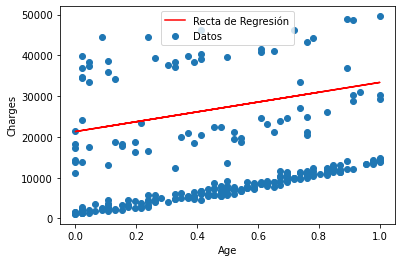

In [20]:
recta_regresion = pendiente * X + intercepto

# Visualizar los datos y la recta de regresión
plt.scatter(X, Y, label='Datos')
plt.plot(X, recta_regresion, color='red', label='Recta de Regresión')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [21]:
X = X_test_sel['bmi'].values
Y = y_test['charges'].values
pendiente = model.coef_[0][1]
intercepto = model.intercept_

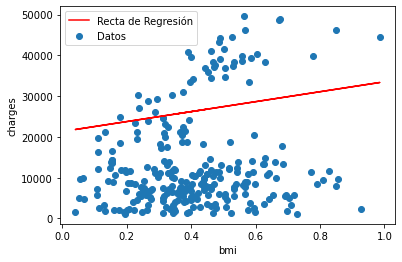

In [22]:
recta_regresion = pendiente * X + intercepto

# Visualizar los datos y la recta de regresión
plt.scatter(X, Y, label='Datos')
plt.plot(X, recta_regresion, color='red', label='Recta de Regresión')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()
plt.show()

In [23]:
X = X_test_sel['children'].values
Y = y_test['charges'].values
pendiente = model.coef_[0][2]
intercepto = model.intercept_

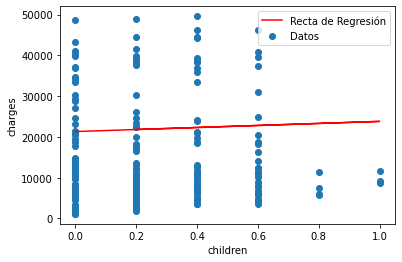

In [24]:
recta_regresion = pendiente * X + intercepto

# Visualizar los datos y la recta de regresión
plt.scatter(X, Y, label='Datos')
plt.plot(X, recta_regresion, color='red', label='Recta de Regresión')
plt.xlabel('children')
plt.ylabel('charges')
plt.legend()
plt.show()

In [25]:
X = X_test_sel['smoker'].values
Y = y_test['charges'].values
pendiente = model.coef_[0][3]
intercepto = model.intercept_

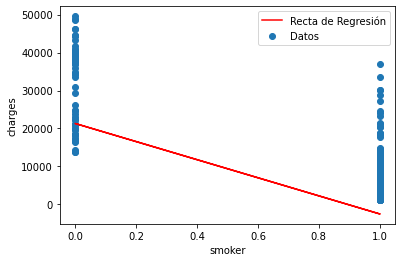

In [26]:
recta_regresion = pendiente * X + intercepto

# Visualizar los datos y la recta de regresión
plt.scatter(X, Y, label='Datos')
plt.plot(X, recta_regresion, color='red', label='Recta de Regresión')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.legend()
plt.show()

1=No fumador  
0=Fumador